In [1]:
from ultralytics import YOLO
import torch

model = YOLO("runs/detect/plate_model9/weights/best.pt")  # load a custom model

In [2]:
results = model('images/test.png')
# results = model('images/testjpg.jpg')
results
results[0].show()  # show results


image 1/1 /home/nhat/Documents/graduate/code/Yolo/images/test.png: 480x640 1 License-Plates, 40.5ms
Speed: 1.4ms preprocess, 40.5ms inference, 443.9ms postprocess per image at shape (1, 3, 480, 640)


In [26]:
# model.train(data = 'dataset/data.yaml', epochs = 30, imgsz = 640, batch = 4, name = 'plate_model')

In [3]:
plate_model = YOLO("runs/detect/plate_model9/weights/best.pt")


image 1/1 /home/nhat/Documents/graduate/code/Yolo/images/test.png: 480x640 1 License-Plates, 25.7ms
Speed: 1.4ms preprocess, 25.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


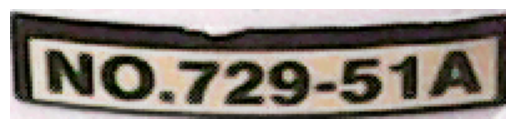

True

In [4]:
results = plate_model('images/test.png')
results
# results[0].show()  # show results

#get the bounding box coordinates
boxes = results[0].boxes

# Print the bounding box coordinates
# for box in boxes:
#     print(f"Bounding box coordinates: {box.xyxy[0]}")  # xyxy format
#     print(f"Confidence: {box.conf[0]}")
#     print(f"Class: {box.cls[0]}")
#     print(f"Mask: {box.mask[0]}")
#     print(f"Keypoints: {box.keypoints[0]}")
#     print(f"Segmentation: {box.segmentation[0]}")

# cut the image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re

def cut_image(image, box):
    # Get the bounding box coordinates
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    
    # Cut the image using the bounding box coordinates
    cut_img = image[y1:y2, x1:x2]
    
    return cut_img
# Load the image
image = cv2.imread('images/test.png')
# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Get the first bounding box
box = boxes[0]
# Cut the image
cut_img = cut_image(image, box)
# Display the cut image
plt.imshow(cut_img)
plt.axis('off')
plt.show()

# Save the cut image
cv2.imwrite('plate_images/test.jpg', cv2.cvtColor(cut_img, cv2.COLOR_RGB2BGR))

/home/nhat/anaconda3/envs/graduate/lib/python3.10/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
/home/nhat/anaconda3/envs/graduate/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[[[[6.0, 8.0], [193.0, 11.0], [193.0, 43.0], [6.0, 41.0]], ('NO.729-51A', 0.9533427953720093)]]
NO.729-51A


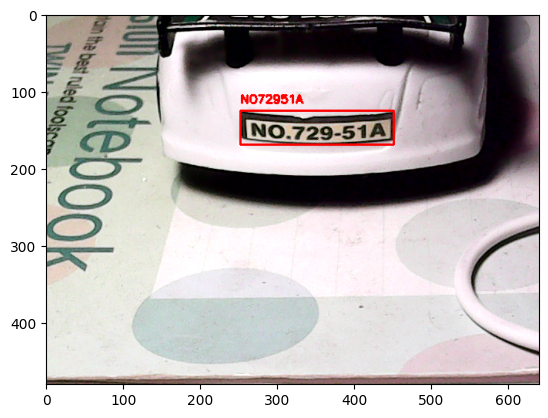

In [5]:
# %pip install paddleocr
# %pip install paddlepaddle

import cv2
import numpy as np
from matplotlib import pyplot as plt
import re
from paddleocr import PaddleOCR
ocr = PaddleOCR(lang = 'vi', use_angle_cls= True, show_log = False)
image = cv2.imread('plate_images/test.jpg')
res = ocr.ocr(image)

#show res
for line in res:
    print(line)
print("=========================================")
# Print the text
for line in res:
    for word_info in line:
        print(word_info[1][0])  # Print the text

#draw the text on the uncut image
def draw_text(image, text, box):
    # Get the bounding box coordinates
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    
    # Draw the text on the image
    cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    #draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return image
# Load the image
image = cv2.imread('images/test.png')
# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Get the first bounding box
box = boxes[0]
# Get the text
text = res[0][0][1][0]
text_normalized = re.sub(r'[^A-Za-z0-9]', '', text)  # Remove special characters    
# Draw the text on the image
image = draw_text(image, text_normalized, box)
# Display the image
plt.imshow(image)